In [1]:
import pandas as pd

In [2]:
amazon_df = pd.read_csv("ratings_Electronics.csv",names=['UserId','ProductId','Ratings','Timestamp'])

In [3]:
amazon_df.head()

,UserId,ProductId,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
amazon_df.shape

(7824482, 4)

In [5]:
amazon_df.dtypes

UserId        object
ProductId     object
Ratings      float64
Timestamp      int64
dtype: object

In [6]:
amazon_df.drop('Timestamp', axis=1, inplace=True)

In [7]:
amazon_df.isnull().sum()

UserId       0
ProductId    0
Ratings      0
dtype: int64

In [8]:
amazon_df['ProductId'].nunique()

476002

In [9]:
amazon_df['UserId'].nunique()

4201696

In [10]:
amazon_df['Ratings'].unique()

array([5., 1., 3., 2., 4.])

In [11]:
amazon_df['Ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Ratings, dtype: int64

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Ratings')

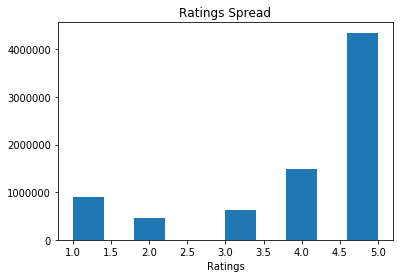

In [13]:
plt.hist(amazon_df['Ratings'])
plt.title('Ratings Spread')
plt.xlabel('Ratings')

Observations -
1. The dataset has 7824482 records
2. There are 476002 unique product Ids
3. There are 4201696 distinct users who have rated a product
4. Ratings are given on a scale of 1 to 5 (only whole numbers)
5. Rating of 5 has got the highest footprint off all the ratings given by the users
6. The dataset doesnt have any null or missing values
7. Listed below are some stats (top products, user ratings) on the products, users and ratings.

In [14]:
#Top 10 products purchased (rated)
amazon_df['ProductId'].value_counts().head(10)

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
Name: ProductId, dtype: int64

In [15]:
#Top 10 products having highest rating count
amazon_df.groupby(['ProductId']).sum().sort_values(by='Ratings',ascending=False)[['Ratings']].head(10)

,Ratings
ProductId,
B0074BW614,81943.0
B00DR0PDNE,64681.0
B007WTAJTO,62697.0
B0019EHU8G,58409.0
B006GWO5WK,52751.0
B003ELYQGG,51028.0
B003ES5ZUU,48346.0
B007R5YDYA,46473.0
B00622AG6S,43419.0


# Take a subset of the dataset to make it less sparse/ denser.

In [82]:
#taking users who have give minimum 50 ratings and 600 ratings
amazon_users_50_ratings_df = amazon_df[amazon_df['UserId'].isin(user_rating_total_df[user_rating_total_df['Ratings'] >=50.0].reset_index()['UserId'])]
amazon_users_600_ratings_df = amazon_df[amazon_df['UserId'].isin(user_rating_total_df[user_rating_total_df['Ratings'] >=600.0].reset_index()['UserId'])]

In [17]:
amazon_users_50_ratings_df.shape

(853459, 3)

In [83]:
#To avoid running out of memory we will take only a subset of data to give recommendations.
amazon_users_600_ratings_df.shape

(23431, 3)

In [19]:
amazon_df.shape

(7824482, 3)

# Popularity based model

In [54]:
#All the products in the dataset have ratings (least being 1 and max being 5). Below are the top 10 popular products based on the cummulative ratings
amazon_df.groupby(['ProductId']).sum().sort_values(by='Ratings',ascending=False)[['Ratings']].head(10)

,Ratings
ProductId,
B0074BW614,81943.0
B00DR0PDNE,64681.0
B007WTAJTO,62697.0
B0019EHU8G,58409.0
B006GWO5WK,52751.0
B003ELYQGG,51028.0
B003ES5ZUU,48346.0
B007R5YDYA,46473.0
B00622AG6S,43419.0


# Split the data randomly into train and test dataset.

In [20]:
from surprise.model_selection import train_test_split
from surprise import Dataset  
import random 
from surprise import Reader, Dataset

In [22]:
reader = Reader()
data = Dataset.load_from_df(amazon_users_50_ratings_df[['UserId', 'ProductId', 'Ratings']], reader)

In [23]:
train_set, test_set = train_test_split(data, test_size=.30)

# Collaborative Filtering Model - Matrix Factorization

In [21]:
from surprise import SVD, accuracy

In [25]:
algo = SVD()
algo.fit(train_set)

In [27]:
predictions = algo.test(test_set)

# Evaluate the above model

In [28]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.0290


1.0290088766248213

In [51]:
#Example of the prediction for a user who has not rated a product and what the other users have rated and will be rated by the model
uid = str('A3CG93783LP0FO')
iid = str('B00IOQOABM')
pred = algo.predict(uid, iid, verbose=True)

user: A3CG93783LP0FO item: B00IOQOABM r_ui = None   est = 4.17   {'was_impossible': False}


In [50]:
##B00IOQOABM Product not rated by the user A3CG93783LP0FO
amazon_df[(amazon_df['UserId'] == 'A3CG93783LP0FO') & (amazon_df['ProductId'] == 'B00IOQOABM')]

,UserId,ProductId,Ratings


In [53]:
#B00IOQOABM Product not rated by the user A3CG93783LP0FO
amazon_df[amazon_df['ProductId'] == 'B00IOQOABM']

,UserId,ProductId,Ratings
7796966,A3KF3TLI2JPQ32,B00IOQOABM,5.0
7796967,A1UOUIB6X8T9YR,B00IOQOABM,1.0


Evaluate against other models [KNNWithMeans, BaselineOnly]

In [29]:
from surprise import KNNWithMeans, BaselineOnly

In [30]:
from surprise.model_selection.validation import cross_validate

In [31]:
test_set_df = pd.DataFrame(test_set)

In [32]:
test_set_df.columns = ['UserId', 'ProductId', 'Ratings']

In [33]:
test_data = Dataset.load_from_df(test_set_df[['UserId', 'ProductId', 'Ratings']], reader)

In [84]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNWithMeans(), BaselineOnly()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')   

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.902867,0.050528,0.046463
SVD,0.907845,1.124713,0.051163
KNNWithMeans,0.982597,0.011416,0.098623


Conclusion: 

Out of the 3 models, BaselineOnly model gives us the best RMSE metric

# Get top - K ( K = 5) recommendations

In [85]:
#Use a sample of the dataset of users who have given a cummulative rating of 500. Avoid running out of memor           
reader = Reader()
data = Dataset.load_from_df(amazon_users_600_ratings_df[['UserId', 'ProductId', 'Ratings']], reader)

In [86]:
trainset_SVD = data.build_full_trainset()
algo = SVD()
algo.fit(trainset_SVD)

In [87]:
testset = trainset_SVD.build_anti_testset()

In [88]:
predictions = algo.test(testset)

In [38]:
from collections import defaultdict

In [94]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [89]:
top_n = get_top_n(predictions, n=5)

In [92]:
#Get the products and the ratings (estimated by the model) for the user 'A17HMM1M7T9PJ1'
top_n.get('A3TAS1AG6FMBQW')

[('B00000JDGO', 5),
 ('B00004RIPE', 5),
 ('B00004S9WR', 5),
 ('B00004TE75', 5),
 ('B00004Z6KW', 5)]

In [91]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A17HMM1M7T9PJ1 ['B00BW6KCTU', 'B001SJVU24', 'B004ZP74IM', 'B000HGQJZW', 'B001M4HXB2']
A3TAS1AG6FMBQW ['B00000JDGO', 'B00004RIPE', 'B00004S9WR', 'B00004TE75', 'B00004Z6KW']
A5JLAU2ARJ0BO ['B000P1O73A', 'B0017Z9SWS', 'B001D7REIK', 'B001FA1NZK', 'B001S2PPT0']
A3PD8JD9L4WEII ['B00BANM6HQ', 'B0079TOEQQ', 'B00BWHILCY', 'B00JDAIMQ2', 'B00DK2JQOQ']
ABVYGB2TKBO8F ['B001CNR39U', 'B001TANZ0W', 'B001HBH1B2', 'B001TOD7ME', 'B005FDXZJU']
A1ZU55TM45Y2R8 ['B008OIYDM6', 'B001TH7GUU', 'B000V1MLBE', 'B003ES5ZUU', 'B001D7REIK']
A1VQHH85U7PX0 ['B000063SGW', 'B00007E89K', 'B0001DBEM4', 'B0002CPBUK', 'B0002GV876']
A36K2N527TXXJN ['B000JMJWV2', 'B00BANM6HQ', 'B002WE4HE2', 'B002WE6D44', 'B0018LYCYK']
ADLVFFE4VBT8 ['B002NPCK1W', 'B0036Q7MV0', 'B003BLQKI6', 'B004XC6GJ0', 'B00BF6HVG4']
A250AXLRBVYKB4 ['B00007IFED', 'B004PDY8QK', 'B00G4UQ6U8', 'B004TS2AOS', 'B001G4QXTQ']
A18HE80910BTZI ['B003ES5ZUU', 'B00B588HY2', 'B0018LYCYK', 'B000V1MLBE', 'B002WE6D44']
A680RUE1FDO8B ['B00005NOKT', 'B00006B9H8', 'B00006I5J7', 'B

In [93]:
# User Id = A3TAS1AG6FMBQW 
# Product Ids ['B00000JDGO', 'B00004RIPE', 'B00004S9WR', 'B00004TE75', 'B00004Z6KW']
amazon_users_600_ratings_df[(amazon_users_600_ratings_df['UserId'] == 'A3TAS1AG6FMBQW')
                            & (amazon_users_600_ratings_df['ProductId'] == 'B00000JDGO')
                            & (amazon_users_600_ratings_df['ProductId'] == 'B00004RIPE')
                            & (amazon_users_600_ratings_df['ProductId'] == 'B00004S9WR')
                            & (amazon_users_600_ratings_df['ProductId'] == 'B00004TE75')
                            & (amazon_users_600_ratings_df['ProductId'] == 'B00004Z6KW')]

,UserId,ProductId,Ratings


# Summary

For the user A3TAS1AG6FMBQW, the 5 products recommended by the model are new products which are not already rated by the user. We will recommend these  5 products for the user -
User Id = A3TAS1AG6FMBQW 
Product Ids ['B00000JDGO', 'B00004RIPE', 'B00004S9WR', 'B00004TE75', 'B00004Z6KW']

We can see the estimated rating given by the model below (stored in defaultdict)

[('B00000JDGO', 5),
 ('B00004RIPE', 5),
 ('B00004S9WR', 5),
 ('B00004TE75', 5),
 ('B00004Z6KW', 5)]